# Trabalho 3
Alunos: João Pedro Banhato Pereira e Pedro de Araujo Bhering Bittencourt

**"A Parallel 2D Numerical Simulation of Tumor Cells Necrosis by Local Hyperthermia (sem Hipertermia)"**

https://iopscience.iop.org/article/10.1088/1742-6596/490/1/012138/pdf



## Relatório

#### Modelo inicial

-  Modelo de Biotransferência de Calor (Equação de Pennes)

\begin{equation}
\begin{cases}
\rho c \frac{\partial T_1(\vec{x}, t)}{\partial t} = \nabla \cdot k \nabla T_1(\vec{x}, t) + \omega_{b} \rho_b c_b (T_a - T_1(\vec{x}, t)) + Q_m(\vec{x}) + Q_r(\vec{x}, t),&\text{em } \Omega, t > 0 \\
\alpha T_1(\vec{x}, t) + \beta \nabla T_1(\vec{x}, t) \cdot \vec{n} = f(\vec{x}, t),& \text{em } \Gamma, t > 0 \\
T_1(\vec{x}, 0) = T_2(\vec{x}),& \text{em } \Omega
\end{cases}
\end{equation}

onde:

 $\rho$ é a densidade do tecido, $c$ o calor específico do tecido e $k$ a condutividade térmica do tecido;

 $c_b$ é o calor específico do sangue, $\rho_b$ a densidade do sangue, $\omega_b$ a taxa de perfusão do sangue e $T_a$ a temperatura arterial do sangue;

 $Q_m$ é a geração de calor metabólico, $T_1$ a temperatura do tecido, $Q_r$ o aquecimento externo (hipertermia) e $T_2$ a temperatura inicial.


#### Considerações para o trabalho da disciplina

- Consideramos a função $T_1$ como sendo independente em relação ao tempo;

- $\dfrac{\partial T_1}{\partial t} = 0$;

- Vamos considerar $T_1$ como $T$:

\begin{equation}
% \begin{cases}
\rho c \cdot 0 = \nabla \cdot k \nabla {T}(\vec{x}) - \omega_{b} \rho_b c_b ({T(\vec{x}) - T_a}) + Q_m(\vec{x}) + Q_r(\vec{x})
% \end{cases}
\end{equation}

\begin{equation}
% \begin{cases}
\nabla \cdot k \nabla T(\vec{x}) =  \omega_{b} \rho_b c_b (T(\vec{x}) - T_a) - Q_m(\vec{x}) - Q_r(\vec{x})
% \end{cases}
\end{equation}

sendo:

 $\nabla \cdot k \nabla {T}(\vec{x})$: difusão do calor;

 $\omega_b \rho_b c_b (T(\vec{x}) - T_a)$: comportamento do sangue;

 $Q_m(\vec{x})$: geração metabólica do calor;

 $Q_r(\vec{x})$: calor externo.

#### Modelos atingidos

- Chegamos aos seguintes modelos para cada trabalho:

Modelo sem hipertermia:

\begin{equation}
    \nabla \cdot k \nabla T(\vec{x}) =  \omega_{b} \rho_b c_b (T(\vec{x})-T_a) - Q_m(\vec{x})
\end{equation}

Modelo com hipertermia:

\begin{equation}
    \nabla \cdot k \nabla T(\vec{x}) =  \omega_{b} \rho_b c_b (T(\vec{x}) - T_a) - Q_m(\vec{x}) - Q_r(\vec{x})
\end{equation}

#### Meio heterogêneo

- Como os valores de $k$ e $\omega_{b}$ variam de acordo com o meio (dentro ou fora do tumor), temos um meio heterogêneo, o que requer uma discretização da difusão do calor($\nabla \cdot k \nabla T(\vec{x})$) com pontos fictícios entre os pontos do domínio.

- Neste trabalho 3, o domínio é de uma dimensão (1D), portanto somente coordenadas em $x$.



\begin{equation}
\nabla \cdot k \nabla T = \nabla \left[k(x) \nabla T(x)\right]       
\end{equation}


\begin{equation}
\begin{aligned}
\nabla \cdot k \nabla T \approx
\frac{1}{h_x^2} \left[k_{i-1/2} T_{{i-1}} - (k_{i-1/2} + k_{i+1/2}) T_{{i}} + k_{i+1/2} T_{{i+1}} \right] \\
\end{aligned}
\end{equation}



com $k_{i+1/2} = \dfrac{2 k_{i}k_{i+1}}{k_{i} + k_{i+1}}$

Agora, vamos considerar $h_x = h$, e a partir disso isolar $T_{{i}}$:

\begin{equation}
\begin{aligned}
\dfrac{1}{h^2} [k_{i-1/2} T_{{i-1}} -\left( k_{i-1/2} + k_{i+1/2}\right)T_{{i}} + k_{i+1/2} T_{{i+1}}]
=\omega_{b_{i,j}} \rho_b c_b(T_{{i}} - T_a) - Q_{m_{i}} - Q_{r_{i}}
\end{aligned}
\end{equation}

Para facilitar a análise, vamos chamar cada termo que multiplica cada $T_{{i}}$ de $q_{i}$:

$q_{i} = \left( k_{i-1/2} + k_{i+1/2} \right)$

$q_{i-1} = k_{i-1/2}$

$q_{i+1} = k_{i+1/2}$

\begin{equation}
\begin{aligned}
- \dfrac{q_{i}}{h^2} T_{i} = \dfrac{-q_{i-1}T_{{i-1}} - q_{i+1}T_{{i+1}}}{h^2} + \omega_{b{i}}\rho_b c_b(T_{{i}} - T_a) - Q_{m_{i}} - Q_{r_{i}}
\end{aligned}
\end{equation}


\begin{equation}
\begin{aligned}
T_{i} = \dfrac{q_{i-1} {T}_{i-1} + q_{i+1} T_{i+1} + h^2 \omega_{b_{i}} \rho_b c_b T_a + h^2Q_{m_{i}} + h^2Q_{r_{i}}}{q_{i} + h^2 \omega_{b_{i}} \rho_b c_b}
\end{aligned}
\end{equation}

- Para o trabalho sem hipertermia, a equação completa não possui o termo $Q_{r_{i}}$.

#### Parâmetros:

##### Quantificação de Incertezas:

Os parâmetros selecionados para a quantificação de incertezas foram $c_b, \rho_b, \omega_b$, que são os parâmetros relacionados ao comportamento do sangue.

Desse modo, as distribuições selecionadas para cada parâmetro foram a distribuição normal, com um valor de desvio padrão de 10% do valor da média em questão, as quais são mostradas a seguir:

$\rho_b = 1 \times10^3 \, \text{Kg/m}^3$

$c_b = 4.2\times10^3 \, \text{J/Kg}^\circ \text{C}$

$
\omega_b =
\begin{cases}
5\times10^{-4} \, \text{s}^{-1}, & \text{(Normal)} \\
1.25\times10^{-3} \, \text{s}^{-1}, & \text{(Tumor)}
\end{cases}
$

Restante dos parâmetros:

$
h = 1 \times 10 ^{-3}
$

$
k =
\begin{cases}
0.50 \, \text{W / m °C}, & \text{(Normal)} \\
0.55\, \text{W / m °C}, & \text{(Tumor)}
\end{cases}
$

$T_a = 37^\circ \text{C}$

$
Q_m =
\begin{cases}
400 \, \text{W/m}^3, & \text{(Normal)} \\
1000 \, \text{W/m}^3, & \text{(Tumor)}
\end{cases}
$

#### Domínio Unidimensional (1D)

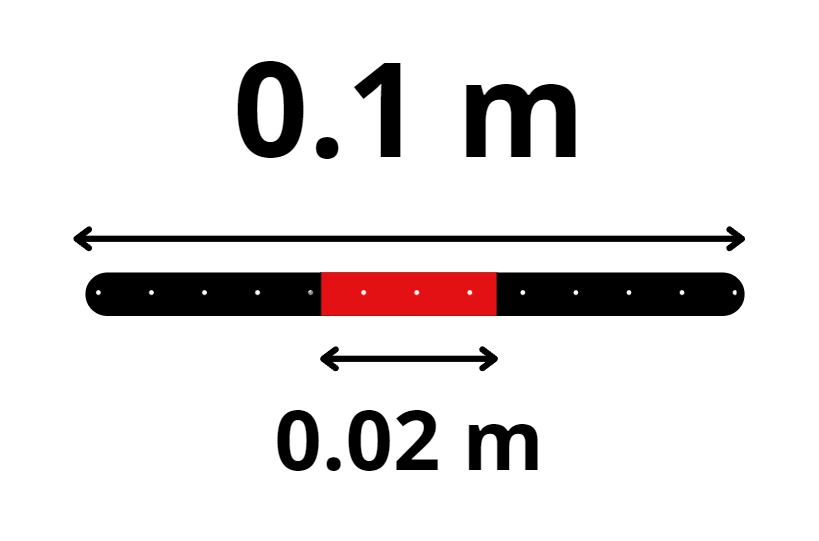

Consideramos uma condição de contorno de Dirichlet na parede esquerda da célula e Neumann com fluxo nulo para a parede direita.

A região em vermelho destaca o tumor, com comprimento de 20% do comprimento total do domínio.

Além disso, fizemos as implementações na linguagem C++ a qual resolve o problema por meio do método de Jacobi o qual possui um número de iterações máximas igual a $10^5$ e erro máximo de $10^{-8}$.

Com isso, logo a seguir, são apresentados os códigos desenvolvidos para os problemas apresentados.

##Parte sem hipertermia

- Resolver a Eq. (1) sem o termo Qr e sem a derivada em relação ao tempo
- Incluir uma motivação e contextualização do tema
- Incluir conclusões sobre o estudo realizado"

In [ ]:
%%writefile main.cpp
#include <iostream>
#include <vector>
#include <fstream>
#include <random>
#include <cmath>
#include <limits>

// Retornar resultado
struct ModelResult {
    std::vector<double> x;
    std::vector<double> T;
};

// Define se o ponto x está no tumor
bool tumor(double x_val) {
    return (x_val >= 0.04 && x_val <= 0.06);
}

// k(X)
double k(double x_val) {
    return tumor(x_val) ? 0.55 : 0.50;
}

// média harmônica
double harmonica_j(int j, const std::vector<double>& x) {
    if (j + 1 >= static_cast<int>(x.size()))
        return k(x[j]);
    double k1 = k(x[j]);
    double k2 = k(x[j+1]);
    return (2.0 * k1 * k2) / (k1 + k2);
}

// w_b: 2.5 vezes maior no tumor
double w_b(double x_val, double WB) {
  if (tumor(x_val)) {
    return WB * 2.5;
  } else {
    return WB;
  }
}

// Q_m
double Q_m(double x_val) {
  if (tumor(x_val)) {
    return 4200.0;
  } else {
    return 420.0;
  }
}

// Modelo
ModelResult model(double PB, double CB, double WB) {
    // domínio e discretização
    const double h = 1e-3;
    const double x_size = 0.1;
    std::vector<double> x;
    for (double xi = 0.0; xi <= x_size + h/2; xi += h) {
        x.push_back(xi);
    }
    int tam = x.size();

    // Parâmetros
    double p_b = PB;
    double c_b = CB;
    const double Ta = 37.0;

    std::vector<double> T(tam, Ta);
    std::vector<double> T_new(tam, 0.0);
    int k_it = 0;
    const int k_max = 100000;
    double error = 1.0;
    const double error_max = 1e-8;

    // Jacobi
    while (k_it < k_max && error > error_max) {
        for (int j = 0; j < tam; j++) {
            if (j == 0) {  // Dirichlet esquerda
                T_new[j] = Ta;
            } else if (j == tam - 1) {  // Neumann direita
                T_new[j] = T[tam - 2];
            } else {
                double q_a = harmonica_j(j, x);
                double q_b = harmonica_j(j + 1, x);
                double denominador = q_a + q_b + (h * h) * w_b(x[j], WB) * p_b * c_b;
                T_new[j] = (q_a * T[j-1] + q_b * T[j+1] + (h * h) * (w_b(x[j], WB) * p_b * c_b * Ta + Q_m(x[j]))) / denominador;
            }
        }
        // erro relativo
        double max_diff = 0.0;
        double max_Tnew = 0.0;
        for (int j = 0; j < tam; j++) {
            double diff = std::fabs(T_new[j] - T[j]);
            if (diff > max_diff) {
                max_diff = diff;
            }
            if (std::fabs(T_new[j]) > max_Tnew) {
                max_Tnew = std::fabs(T_new[j]);
            }
        }
        if (max_Tnew == 0.0)
            error = 0.0;
        else
            error = max_diff / max_Tnew;

        T = T_new;  // Atualiza T para a próxima iteração
        k_it++;
    }

    if (k_it >= k_max) {
        std::cerr << "Aviso: Número máximo de iterações atingido sem convergência.\n";
    }

    ModelResult result { x, T };
    return result;
}

int main() {
    std::random_device rd;
    std::mt19937 gen(rd());
    // Distribuição normal
    std::normal_distribution<double> dist_PB(1e3, 1e2);
    std::normal_distribution<double> dist_CB(4.2e3, 4.2e2);
    std::normal_distribution<double> dist_WB(5e-4, 5e-5);

    const int samples = 100; // Número de amostras
    std::vector< std::vector<double> > evals_u;
    std::vector<double> x;

    for (int i = 0; i < samples; i++) {
        double PB = dist_PB(gen);
        double CB = dist_CB(gen);
        double WB = dist_WB(gen);

        ModelResult result = model(PB, CB, WB);
        if (x.empty())
            x = result.x;

        evals_u.push_back(result.T);
    }

    // Salvar os resultados em um arquivo CSV
    std::ofstream file("sem_hip.csv");
    if (!file.is_open()) {
        std::cerr << "Erro ao abrir o arquivo para escrita.\n";
        return 1;
    }

    // Cabeçalho do CSV
    file << "x";
    for (int i = 0; i < samples; i++) {
        file << ",T" << i;
    }
    file << "\n";

    // Escreve os dados: cada linha contém um valor de x e os respectivos T dos samples
    int N = x.size();
    for (int j = 0; j < N; j++) {
        file << x[j];
        for (int i = 0; i < samples; i++) {
            file << "," << evals_u[i][j];
        }
        file << "\n";
    }
    file.close();

    std::cout << "Resultados salvos em 'sem_hip.csv'.\n";

    return 0;
}


Overwriting main.cpp


In [ ]:
!g++ main.cpp -o main
!./main

Resultados salvos em 'sem_hip.csv'.


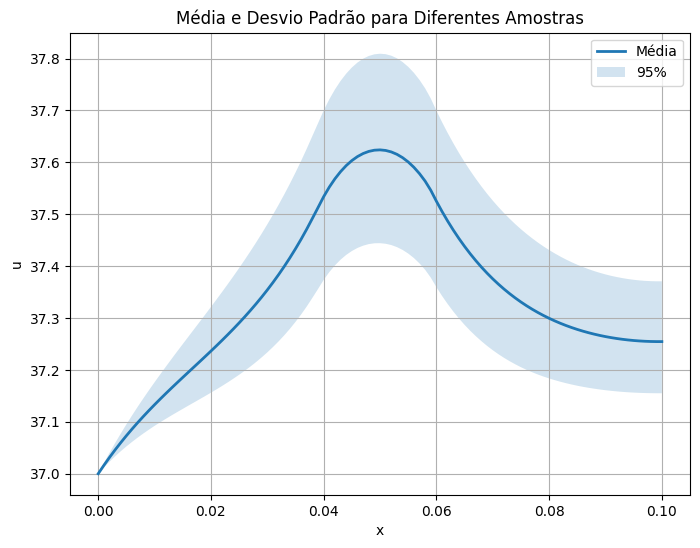

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv("sem_hip.csv")
x = df["x"]
evals_u = df.iloc[:, 1:].to_numpy()

# Calcular média e desvio padrão
media = np.mean(evals_u, axis=1)
std = np.std(evals_u, axis=1)

# Plotagem
plt.figure(figsize=(8, 6))
plt.plot(x, media, label="Média", lw=2)
# plt.fill_between(x, media - std, media + std, alpha=0.3, label="± Desvio Padrão")
percentis = np.percentile(evals_u, [2.5, 97.5], axis=1)
plt.fill_between(x, percentis[0], percentis[1], alpha=0.2, label="95%")
plt.title("Média e Desvio Padrão para Diferentes Amostras")
plt.xlabel("x")
plt.ylabel("u")
plt.legend()
plt.grid()
plt.show()


##Parte com hipertermia

- Resolver a Eq. (1) com o termo Qr e sem a derivada em relação ao tempo
- Incluir uma motivação e contextualização do tema
- Incluir conclusões sobre o estudo realizado

###Ajuste na fórmula do $Q_r$

Bom, como estamos utilizando um domínio em 1D, deveremos modificar a fórmula do $Q_r$ para que a mesma esteja adaptada para esse caso. Ou seja, ao invés de $r(\vec x)$ ser um vetor de $x$ e $y$, ele será apenas dependente de x. Com isso:

$$
Q_r(\vec{x}, t) = \sum_{i=1}^n A_i.e^{-r(\vec{x})_i^2/ r_{0,i}^2}
$$

Onde $r = ((x-x_0)^2)^{0.5}$ .

Feito isso, uma outra adaptação que se viu necessária a ser feita foi de ajustar o valor de $A$. Para o trabalho 2D, ele possuia um valor de $1.3\times10^6 \text{ W}$. Porém, como o domínio é menor, nesse caso, foi necessária ser feita uma adaptação. Com isso, não econtramos uma maneira definida para fazer essa conversão, assim, observamos no trabalho [UM ESTUDO COMPARATIVO DE SIMULAÇÃO DE HIPERTERMIA COM NANOPARTÍCULAS MAGNÉTICAS](https://drive.google.com/file/d/12sD2aMbONDpgaC6_f9XNbqQt1eMtNLaP/view), que aborda o problema em um domínio 1D, que o valor de $A$ é menor.

Assim, para fazermos uma estimativa do valor, foi feita uma regra de 3 composta dos valores dos parâmetros que se diferenciavam de um trabalho para o outro, visto que ambos os trabalhos apresentam os mesmos parâmetros. Os parâmetros que apresentam diferenças são: $A$, $k$ e $r_0$. Como $k$ apresenta 2 valores, dentro do tumor e fora, foi considerado a média entre eles no cálculo para estimarmos o valor de $A$. Desse modo:

$$
\frac{A_1}{A_2} = \frac{k_{medio_1}}{k_{medio_2}} \times \frac{r_{0_1}}{r_{0_2}}
$$

$$
A_2 = A_1 \times \frac{k_{medio_2}}{k_{medio_1}} \times \frac{r_{0_2}}{r_{0_1}}
$$

$$
A_2 = 0.2\times10^6 \times \frac{\frac{0.5 + 0.55}{2}}{\frac{0.51 + 0.64}{2}} \times \frac{3.1\times10^{-3}}{2.5\times10^{-3}}
$$

$$
A_2 = 0.226 \times 10^6 \text{ W}
$$

Desse modo, conseguimos ter uma estimativa do valor de $A$ para podermos utilizar nas simulações deste trabalho.

In [ ]:
%%writefile main.cpp
#include <iostream>
#include <vector>
#include <fstream>
#include <random>
#include <cmath>
#include <limits>

using namespace std;

//resultado
struct ModelResult {
    vector<double> x;
    vector<double> T;
};

//tumor
bool tumor(double x_val) {
    return (x_val >= 0.04 && x_val <= 0.06);
}

//condutividade
double k(double x_val) {
    return tumor(x_val) ? 0.55 : 0.50;
}

//média harmônica
double harmonica_j(int j, const vector<double>& x) {
    if (j <= 0)
        return k(x[0]);
    if (j >= static_cast<int>(x.size()) - 1)
        return k(x.back()); // Para a borda direita
    double k1 = k(x[j - 1]);
    double k2 = k(x[j]);
    return (2.0 * k1 * k2) / (k1 + k2);
}

//Qr:
double Q_r(const vector<double>& xi, double x, int n) {
    const double r_o = 3.1e-3;
    const double A = 0.226e6 / n; //Divide pelo número de pontos de injeção
    double Qr = 0;
    for (int site = 0; site < n; ++site) {
        double r = sqrt(pow(x - xi[site], 2));
        Qr += A * exp(-pow(r / r_o, 2));
    }
    return Qr;
}

ModelResult model(double PB, double CB, double WB) {
    //domínio e discretização
    const double h = 1e-3;
    const double x_size = 0.1;
    vector<double> x;
    for (double xi = 0.0; xi <= x_size + h/2; xi += h) {
        x.push_back(xi);
    }
    int tam = x.size();

    //parâmetros
    double p_b = PB;
    double c_b = CB;
    const double Ta = 37.0;

    //w_b: aumenta WB em 2.5 vezes no tumor
    auto w_b = [WB](double x_val) -> double {
        return tumor(x_val) ? WB * 2.5 : WB;
    };

    //Q_m
    auto Q_m = [](double x_val) -> double {
        return tumor(x_val) ? 4200.0 : 420.0;
    };

    vector<double> T(tam, Ta);
    vector<double> T_new(tam, 0.0);
    int k_it = 0;
    const int k_max = 100000;
    double error = 1.0;
    const double error_max = 1e-8;

    //Método de Jacobi:
    while (k_it < k_max && error > error_max) {
        for (int j = 0; j < tam; j++) {
            if (j == 0) {  //condição de contorno Dirichlet à esquerda
                T_new[j] = Ta;
            } else if (j == tam - 1) {  //condição de contorno Neumann à direita
                T_new[j] = T[tam - 2];
            } else {
                double q_left  = harmonica_j(j, x);     //q_{i-1}
                double q_right = harmonica_j(j + 1, x);   //q_{i+1}
                double q_i = q_left + q_right;             //q_i

                T_new[j] = (
                    q_left * T[j-1] +
                    q_right * T[j+1] +
                    h * h * ( w_b(x[j]) * p_b * c_b * Ta +
                              Q_m(x[j]) +
                              //Q_r({0.05}, x[j], 1) //1 local de injeção
                              Q_r({0.045, 0.055}, x[j], 2) //2 locais de injeção
                            )
                ) / (
                    q_i + h * h * w_b(x[j]) * p_b * c_b
                );
            }
        }
        //Erro relativo (norma infinito)
        double max_diff = 0.0;
        double max_Tnew = 0.0;
        for (int j = 0; j < tam; j++) {
            double diff = fabs(T_new[j] - T[j]);
            if (diff > max_diff) {
                max_diff = diff;
            }
            if (fabs(T_new[j]) > max_Tnew) {
                max_Tnew = fabs(T_new[j]);
            }
        }
        if (max_Tnew == 0.0)
            error = 0.0;
        else
            error = max_diff / max_Tnew;

        T = T_new;
        k_it++;
    }

    if (k_it >= k_max) {
        cerr << "Aviso: Número máximo de iterações atingido sem convergência.\n";
    }

    ModelResult result { x, T };
    return result;
}

int main() {
    random_device rd;
    mt19937 gen(rd());
    normal_distribution<double> dist_PB(1e3, 100);
    normal_distribution<double> dist_CB(4.2e3, 100);
    normal_distribution<double> dist_WB(5e-4, 2e-5);

    const int samples = 100;
    vector< vector<double> > evals_u;
    vector<double> x;

    for (int i = 0; i < samples; i++) {
        double PB = dist_PB(gen);
        double CB = dist_CB(gen);
        double WB = dist_WB(gen);

        ModelResult result = model(PB, CB, WB);
        if (x.empty())
            x = result.x;

        evals_u.push_back(result.T);
    }

    //Salvar os resultados em um arquivo CSV
    ofstream file("hip.csv");
    if (!file.is_open()) {
        cerr << "Erro ao abrir o arquivo para escrita.\n";
        return 1;
    }

    //Cabeçalho do CSV
    file << "x";
    for (int i = 0; i < samples; i++) {
        file << ",T" << i;
    }
    file << "\n";

    //Escreve os dados: cada linha contém um valor de x e os respectivos T dos samples
    int N = x.size();
    for (int j = 0; j < N; j++) {
        file << x[j];
        for (int i = 0; i < samples; i++) {
            file << "," << evals_u[i][j];
        }
        file << "\n";
    }
    file.close();

    cout << "Resultados salvos em 'hip.csv'.\n";

    return 0;
}

Overwriting main.cpp


In [ ]:
!g++ main.cpp -o main
!./main

Resultados salvos em 'hip.csv'.


Porcentagem de necrose no tumor: 100.0%
Porcentagem de necrose no tecido saudável: 5.0%


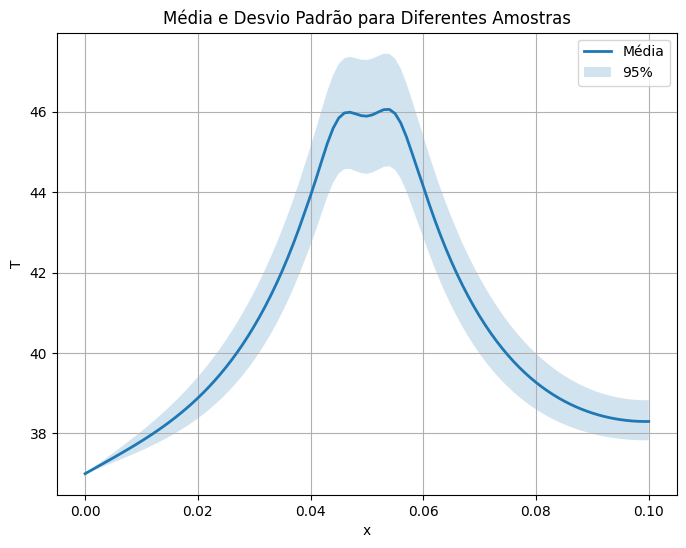

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Carregar dados
df = pd.read_csv("hip.csv")
x = df["x"]
evals_u = df.iloc[:, 1:].to_numpy()

#Calcular média e desvio padrão
media = np.mean(evals_u, axis=1)
std = np.std(evals_u, axis=1)

#Define a função que determina se um ponto está no tumor
def is_tumor(x_val):
    return (x_val >= 0.04) and (x_val <= 0.06)

#Separar os índices para pontos dentro e fora do tumor
indices_tumor = np.array([i for i, xi in enumerate(x) if is_tumor(xi)])
indices_saudavel = np.array([i for i, xi in enumerate(x) if not is_tumor(xi)])

#Cálculo da necrose para cada região
necrosis_tumor_count = np.sum(media[indices_tumor] > 43)
necrosis_tumor_fraction = necrosis_tumor_count / len(indices_tumor) * 100

necrosis_saudavel_count = np.sum(media[indices_saudavel] > 43)
necrosis_saudavel_fraction = necrosis_saudavel_count / len(indices_saudavel) * 100

print(f"Porcentagem de necrose no tumor: {necrosis_tumor_fraction}%")
print(f"Porcentagem de necrose no tecido saudável: {necrosis_saudavel_fraction}%")

# Plotagem
plt.figure(figsize=(8, 6))
plt.plot(x, media, label="Média", lw=2)
percentis = np.percentile(evals_u, [2.5, 97.5], axis=1)
plt.fill_between(x, percentis[0], percentis[1], alpha=0.2, label="95%")
plt.title("Média e Desvio Padrão para Diferentes Amostras")
plt.xlabel("x")
plt.ylabel("T")
plt.legend()
plt.grid()
plt.show()


## Conclusão

Por meio deste trabalho, foi possível analisar a biotransferência de calor no tecido tumoral, quando utiliza-se a quantificação de incertezas, no nosso caso, em parâmetros relacionados ao comportamento sanguíneo. A implementação em C++ se mostou eficaz, com desempenho aceitável, mesmo em execução serial, para valor de $h = 1 \times 10 ^{-3}$.

Os resultados obtidos ressaltaram, novamente, que a geração de calor metabólico (Qm) identifica a região de maior temperatura, ou seja, a identificação da região tumoral. Ademais, a aplicação de calor externo (Qr) pela hipertermia foi essencial para atingir a temperatura necessária à necrose das células tumorais.

Comparando os resultados obtidos neste trabalho com os resultados obtidos no trabalho 1, percebe-se que o valores de temperatura na região tumoral foram próximos do esperado, porém não de maneira perfeita, como esperado, uma vez que, ao reduzir o problema de 2 dimensões para apenas 1, a difusão do calor torna-se mais concentrada, como se a dimensão fictícea y fosse "muito fina", o que causa um aumento sutil da temperatura nessa região de tumor.

Desse modo, o trabalho destaca o potencial da hipertermia como tratamento complementar ao câncer e a importância da utilização das simulações numéricas na questão da verificação dos resultados e da qualidade da utlização da técnica da hipertermia. Além disso, ressalta-se o papel da quantificação de incertezas neste tipo de tratamento, uma vez que engloba um intervalo de valores maior, o que pode representar de maneira mais fiel um evento biológico, haja vista que no corpo humano podem haver variações em certos parâmetros.